In [0]:
!pip install tsfresh

In [0]:
from sklearn import preprocessing
import pandas as pd
# import tsfresh
# from tsfresh import extract_features
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Load feature file

In [3]:
df = pd.read_csv('/content/drive/My Drive/BEAT_PD/Data/CIS-PD/training_data/Processed_files/v2/All_Train_v1.0.2.csv')
df.head()

,Unnamed: 0,measurement_id,subject_id,on_off,dyskinesia,tremor,AVG_x,AVG_y,AVG_z,STD_x,STD_y,STD_z,RMS_x,RMS_y,RMS_z,MinMax_x,MinMax_y,MinMax_z,FiltSTD3_x,FiltSTD3_y,FiltSTD3_z,Corr_yz,Peaks50hz_x,Peaks50hz_y,Peaks50hz_z,skew_x,skew_y,skew_z,kurt_x,kurt_y,kurt_z,AVG_SMA,STD_SMA,RMS_SMA,MinMax_SMA,FiltSTD3_SMA,Peaks50hz_SMA,skew_SMA,kurt_SMA,Min_SMA_BP,Max_SMA_BP,STD_SMA_BP,Med_SMA_BP,skew_SMA_BP,kurt_SMA_BP,FreqMaxPSD_SMA_BP,Peaks50hz_SMA_BP,AVG_MAXPeaks_SMA_BP,STD_MAXPeaks_SMA_BP,VAR_MAXPeaks_SMA_BP,Med_MAXPeaks_SMA_BP,DistMaxPeaksSMA_1,DistMaxPeaksSMA_2,DistMaxPeaksSMA_3,DistMaxPeaksSMA_4,Abs_BP_SMA_1_to_3Hz,Abs_BP_SMA_3_to_7Hz,Abs_BP_SMA_1_to_10Hz,Abs_BP_SMA_3_to_10Hz,Rel_BP_SMA_1_to_3Hz,Rel_BP_SMA_3_to_7Hz,Rel_BP_SMA_1_to_10Hz,Rel_BP_SMA_3_to_10Hz
0,0,cc7b822c-e310-46f0-a8ea-98c95fdb67a1,1004,1.0,1.0,1.0,0.054452,0.322197,0.698873,0.373653,0.407493,0.405940,0.377600,0.519482,0.808214,8.769043,9.460938,6.954834,854.0,854.0,755.0,0.509150,5.0,55.0,6.0,-0.968443,0.470836,1.409108,6.400680,1.716051,2.642136,1.016154,0.154064,1.032305,7.489629,745.0,228.0,5.819569,94.146477,-2.778404,2.761872,0.154064,7.484231e-06,-0.558953,30.268464,1.8,45.0,13814.800000,9836.083497,9.674854e+07,13003.0,514.0,211.0,236.0,236.0,1.660314e-02,8.134745e-03,0.027674,1.107121e-02,0.520460,0.255001,0.867511,0.347050
1,1,5163afe8-a6b0-4ea4-b2ba-9b4501dd5912,1004,0.0,0.0,0.0,0.074134,0.081874,0.823729,0.292569,0.285953,0.372113,0.301815,0.297443,0.903879,10.599854,4.578369,7.179688,757.0,757.0,968.0,0.750197,1.0,12.0,4.0,-1.082600,1.562281,1.998585,9.976239,3.981422,3.415090,0.994074,0.074029,0.998280,7.223960,908.0,301.0,15.646557,600.502892,-1.797153,2.208451,0.074029,6.830130e-07,0.834695,147.333891,1.7,17.0,46845.294118,11748.681166,1.380315e+08,49614.0,47939.0,391.0,181.0,181.0,5.844152e-07,5.962829e-07,0.000001,9.129417e-07,0.344747,0.351748,0.883292,0.538545
2,2,5cf68c8e-0b7a-4b73-ad4f-015c7a20fb5a,1004,1.0,1.0,1.0,0.791880,0.273321,0.197197,0.197583,0.394550,0.260380,0.816158,0.479973,0.326626,6.768799,4.093750,6.220703,599.0,599.0,707.0,-0.247554,2.0,8.0,14.0,0.928359,-0.206234,2.621623,33.204894,-1.445806,11.622991,0.997105,0.078579,1.001585,5.255477,616.0,303.0,16.273824,429.727838,-2.043263,2.412209,0.078579,1.441539e-05,3.112186,177.418947,1.8,19.0,29583.684211,10419.452976,1.085650e+08,31769.0,645.0,28246.0,177.0,177.0,2.901085e-03,2.333237e-03,0.006816,3.914435e-03,0.399039,0.320932,0.937462,0.538423
3,3,fb188ae2-2173-4137-9236-19a137a402c2,1004,3.0,3.0,3.0,0.423182,0.654178,0.248452,0.308815,0.411340,0.289848,0.523879,0.772754,0.381760,3.381836,4.306885,3.177246,1456.0,1456.0,1999.0,0.391087,8.0,20.0,0.0,-0.419901,-1.362703,-1.080864,0.689618,0.772720,0.416970,1.006023,0.050483,1.008632,3.467728,732.0,298.0,2.564488,66.608393,-0.732321,1.100528,0.050483,-1.561527e-04,0.505173,23.538420,1.4,95.0,32700.652632,17282.320529,2.986786e+08,35057.0,356.0,1092.0,232.0,232.0,8.792525e-04,6.602315e-04,0.002053,1.173877e-03,0.375906,0.282268,0.877773,0.501866
4,4,19a3e9ea-fce1-40b7-9457-2618970beb7b,1004,1.0,1.0,1.0,0.524878,0.509686,0.314112,0.297205,0.423762,0.342080,0.603181,0.662837,0.464419,3.525391,5.834961,5.738526,1315.0,1315.0,1276.0,0.490333,12.0,21.0,3.0,-0.224772,-0.573604,-0.450277,0.042139,-0.592047,-0.327536,1.006283,0.064806,1.009389,5.859008,1149.0,298.0,11.025064,478.484688,-1.725859,2.106261,0.064806,-5.454373e-05,1.288797,121.938505,1.8,47.0,24490.765957,17779.355634,3.161055e+08,17279.0,4270.0,165.0,199.0,199.0,1.846220e-03,1.196197e-03,0.003711,1.864816e-03,0.443346,0.287251,0.891157,0.447811


##Feature Extraction using Tsfresh

In [0]:
df1 = pd.read_csv('/content/drive/My Drive/BEAT_PD/Data/CIS-PD/training_data/0345af44-acb5-4338-86b3-20e51ac98258.csv')
df1.head()

,Timestamp,X,Y,Z
0,0.000,0.467773,0.854736,0.121094
1,0.021,0.477539,0.866943,0.130859
2,0.041,0.481201,0.879883,0.134277
3,0.061,0.491943,0.896484,0.137695
4,0.081,0.500000,0.891113,0.137939


In [0]:
df1.insert(0, 'ID', range(1,1 + len(df1)))
df1.head()

,ID,Timestamp,X,Y,Z
0,1,0.000,0.467773,0.854736,0.121094
1,2,0.021,0.477539,0.866943,0.130859
2,3,0.041,0.481201,0.879883,0.134277
3,4,0.061,0.491943,0.896484,0.137695
4,5,0.081,0.500000,0.891113,0.137939


In [0]:
feature_extraction_1 = extract_features(df1, column_id='ID' , column_sort='Timestamp' ,default_fc_parameters=tsfresh.feature_extraction.settings.MinimalFCParameters())

Feature Extraction: 100%|██████████| 5/5 [01:00<00:00, 12.17s/it]


In [0]:
feature_extraction_1.head()

variable,X__length,X__maximum,X__mean,X__median,X__minimum,X__standard_deviation,X__sum_values,X__variance,Y__length,Y__maximum,Y__mean,Y__median,Y__minimum,Y__standard_deviation,Y__sum_values,Y__variance,Z__length,Z__maximum,Z__mean,Z__median,Z__minimum,Z__standard_deviation,Z__sum_values,Z__variance
id,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.467773,0.467773,0.467773,0.467773,0.0,0.467773,0.0,1.0,0.854736,0.854736,0.854736,0.854736,0.0,0.854736,0.0,1.0,0.121094,0.121094,0.121094,0.121094,0.0,0.121094,0.0
2,1.0,0.477539,0.477539,0.477539,0.477539,0.0,0.477539,0.0,1.0,0.866943,0.866943,0.866943,0.866943,0.0,0.866943,0.0,1.0,0.130859,0.130859,0.130859,0.130859,0.0,0.130859,0.0
3,1.0,0.481201,0.481201,0.481201,0.481201,0.0,0.481201,0.0,1.0,0.879883,0.879883,0.879883,0.879883,0.0,0.879883,0.0,1.0,0.134277,0.134277,0.134277,0.134277,0.0,0.134277,0.0
4,1.0,0.491943,0.491943,0.491943,0.491943,0.0,0.491943,0.0,1.0,0.896484,0.896484,0.896484,0.896484,0.0,0.896484,0.0,1.0,0.137695,0.137695,0.137695,0.137695,0.0,0.137695,0.0
5,1.0,0.500000,0.500000,0.500000,0.500000,0.0,0.500000,0.0,1.0,0.891113,0.891113,0.891113,0.891113,0.0,0.891113,0.0,1.0,0.137939,0.137939,0.137939,0.137939,0.0,0.137939,0.0


##PCA for single user 



In [10]:
user_id =1004 
df_1004 = df[df['subject_id']==user_id].iloc[:,3:]
df_1004 = df_1004.iloc[:,:1854]

y = pd.DataFrame(df_1004.loc[:,'on_off'])

from sklearn.preprocessing import StandardScaler
# variables = ['X', 'Y', 'Z']

x_features = pd.DataFrame(df_1004.iloc[:,3:])
x_features = x_features.fillna(x_features.median())
x_features = StandardScaler().fit_transform(x_features)


from sklearn.decomposition import PCA

pca = PCA(n_components=15)

pct = pca.fit_transform(x_features)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'])

principal_df['on_off'] = y['on_off'].values
principal_df.head()


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,on_off
0,-0.350616,1.460525,1.689852,-2.650612,0.694267,0.631175,0.332979,-1.392873,-0.690135,0.982430,0.325801,-0.900262,-0.132518,0.515591,0.145144,1.0
1,-2.637333,4.249050,-0.042553,0.442002,1.913002,5.335866,6.343245,-0.341449,0.193884,0.592552,1.671426,1.928554,-0.942042,-1.831454,-2.017063,0.0
2,-1.169955,4.856976,2.150689,3.970626,-1.810587,1.294153,0.921557,4.168006,-1.901869,-2.890986,-2.539336,-0.115126,-0.696613,1.861297,1.794803,1.0
3,-2.714836,-2.200070,-0.780331,1.088400,-0.139413,-0.953802,-1.416824,0.336711,0.519941,-1.172355,-1.044043,1.080589,-0.829146,0.205166,-0.240035,3.0
4,-2.064524,0.914847,-0.683223,1.828702,0.924797,-0.402539,-0.465508,-0.036634,-1.637055,-0.886411,-1.633266,-0.459887,-1.516894,-1.274264,-0.679936,1.0


In [5]:
pca.explained_variance_ratio_

array([0.31853656, 0.13885185, 0.08007136, 0.06786343, 0.05588924,
       0.0458249 , 0.03817464, 0.03141725, 0.02825176, 0.02329472,
       0.02161452, 0.01971394, 0.01507253, 0.0139215 , 0.01170347])

##PCA for all users

In [6]:
all_features = pd.DataFrame(df.iloc[:,6:])
# all_features.shape
all_features.replace('',np.NaN,inplace=True)
all_features.dropna(axis=0,inplace=True)
# all_features.shape

from sklearn.preprocessing import StandardScaler
all_features = StandardScaler().fit_transform(all_features)

y = pd.DataFrame(df.loc[:,'on_off'])

from sklearn.decomposition import PCA

pca = PCA(n_components=10)

pct = pca.fit_transform(all_features)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

# principal_df['on_off'] = y['on_off'].values
principal_df.head()


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,2.907472,-2.201400,-2.279339,-1.737598,2.068888,-2.017468,0.731331,-1.414446,0.502650,-0.195209
1,-0.259018,-4.873178,-1.997255,2.444689,2.544016,2.816439,-0.756214,-2.544638,4.793885,0.863296
2,0.723095,-3.417461,0.478203,-1.169931,2.114080,4.190875,-1.705840,3.137274,1.870641,0.580714
3,-1.488137,1.936899,0.414275,0.493688,-1.029397,0.183254,0.087775,1.136898,-0.689057,0.449263
4,-0.161197,-0.091224,0.007119,0.136866,-0.179143,-0.354865,-0.401965,1.860465,-1.218606,1.490393


In [7]:
pca.explained_variance_ratio_

array([0.21319584, 0.10869223, 0.07343809, 0.0639698 , 0.05915137,
       0.04599778, 0.04199871, 0.03698316, 0.03234508, 0.02949634])

##Divide data into on_off, tremors, dyskinesia


In [0]:
df.replace('',np.NaN,inplace=True)
df_on_off  = df[df['on_off'].notnull()]
df_tremor  = df[df['tremor'].notnull()]
df_dyskinesia  = df[df['dyskinesia'].notnull()]
print(df_on_off.shape,df_dyskinesia.shape,df_tremor.shape)

(1767, 63) (1188, 63) (1462, 63)


##RFE


In [0]:
# Recurssive Feature Elemination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


on_off_features = pd.DataFrame(df_on_off)
# on_off_features.head()
on_off_features.replace('',np.NaN,inplace=True)
on_off_features.dropna(axis=0,inplace=True)
# all_features.shape
y = pd.DataFrame(on_off_features.loc[:,'on_off'])
on_off_features = pd.DataFrame(on_off_features.iloc[:,6:])

array1 = on_off_features.values
array2 = y.values
X = array1[:,:]
Y = array2[:,:]


# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features: 10
Selected Features: [False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False  True  True  True  True  True  True  True
  True False False False False False False False False]
Feature Ranking: [37 29 40 38 41 39 33 30 35 17 14 13  3  2  1 32 19  6 10 23 24 22 15 11
  9 27 42 26 16  1  5 12  4 20 21 43 48 25  7 18  8  1  1  1  1  1  1  1
  1 45 47 44 46 36 34 28 31]


## PCA  for On_off

In [0]:

on_off_features = pd.DataFrame(df_on_off)

on_off_features.replace('',np.NaN,inplace=True)
on_off_features.dropna(axis=0,inplace=True)

y = pd.DataFrame(on_off_features.loc[:,'on_off'])
on_off_features = pd.DataFrame(on_off_features.iloc[:,6:])

from sklearn.preprocessing import StandardScaler
on_off_features = StandardScaler().fit_transform(on_off_features)

from sklearn.decomposition import PCA

pca_on_off = PCA(n_components=10)

pct_on_off = pca_on_off.fit_transform(on_off_features)

on_off_df = pd.DataFrame(pct_on_off,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

on_off_df['on_off'] = y['on_off'].values
on_off_df.head()


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,on_off
0,2.289435,-2.297149,-1.449679,3.160600,1.087489,-1.587016,0.618380,-1.095535,0.280402,-1.396397,1.0
1,-0.748782,-5.012224,-0.744027,-0.839640,4.413029,1.879481,-1.336789,-3.011662,-4.940642,-0.628427,0.0
2,0.097189,-3.432656,2.273839,1.049646,1.711630,4.306058,-0.667771,2.199496,-2.555887,3.631295,1.0
3,-2.148912,1.596675,-0.104121,-0.951931,-1.081928,0.363148,0.479793,0.294727,0.590493,1.324272,3.0
4,-0.772851,-0.456194,0.247669,-0.385269,-0.362902,-0.675597,0.286804,1.295322,0.890502,1.575331,1.0


In [0]:
 pca_on_off.explained_variance_ratio_

array([0.23208555, 0.11234393, 0.08150998, 0.06640832, 0.0564934 ,
       0.04237259, 0.04063321, 0.03654948, 0.02974112, 0.02746767])

## PCA for dyskinesia

In [0]:
dyskinesia_features = pd.DataFrame(df_dyskinesia)
dyskinesia_features.replace('',np.NaN,inplace=True)
dyskinesia_features.dropna(axis=0,inplace=True)

y = pd.DataFrame(dyskinesia_features.loc[:,'dyskinesia'])
dyskinesia_features = pd.DataFrame(dyskinesia_features.iloc[:,6:])


from sklearn.preprocessing import StandardScaler
dyskinesia_features = StandardScaler().fit_transform(dyskinesia_features)

from sklearn.decomposition import PCA

pca_dyskinesia = PCA(n_components=10)

pct_dyskinesia = pca_dyskinesia.fit_transform(dyskinesia_features)

dyskinesia_df = pd.DataFrame(pct_dyskinesia,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

dyskinesia_df['dyskinesia'] = y['dyskinesia'].values
dyskinesia_df.head()


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,dyskinesia
0,2.289437,-2.297061,-1.449803,3.161820,1.087593,-1.584811,0.611432,-1.099942,0.295083,-1.435113,1.0
1,-0.748780,-5.012444,-0.744372,-0.842390,4.413405,1.873443,-1.327094,-2.987330,-4.960664,-0.662701,0.0
2,0.097190,-3.432555,2.274342,1.050758,1.708124,4.311546,-0.664422,2.179635,-2.571350,3.711965,1.0
3,-2.148917,1.596545,-0.104668,-0.953588,-1.081270,0.352827,0.483162,0.313244,0.599349,1.322230,3.0
4,-0.772853,-0.456219,0.247676,-0.386579,-0.362139,-0.677447,0.291558,1.307675,0.874157,1.619099,1.0


In [0]:
pca_dyskinesia.explained_variance_ratio_

array([0.23208555, 0.11234393, 0.08150998, 0.06640837, 0.05649346,
       0.04237284, 0.04063362, 0.03655113, 0.02974653, 0.0274463 ])

## PCA for tremors

In [0]:
tremor_features = pd.DataFrame(df_tremor)
tremor_features .replace('',np.NaN,inplace=True)
tremor_features .dropna(axis=0,inplace=True)

y = pd.DataFrame(tremor_features.loc[:,'tremor'])
tremor_features  = pd.DataFrame(tremor_features.iloc[:,6:])


from sklearn.preprocessing import StandardScaler
tremor_features = StandardScaler().fit_transform(tremor_features)

from sklearn.decomposition import PCA

pca_tremor = PCA(n_components=10)

pct_tremor = pca_tremor.fit_transform(tremor_features)

tremor_df = pd.DataFrame(pct_tremor,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

tremor_df['tremor'] = y['tremor'].values
tremor_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,tremor
0,2.289439,-2.297037,-1.449449,3.161540,1.087292,-1.579834,0.613916,-1.106394,0.298152,-1.404840,1.0
1,-0.748779,-5.012462,-0.744137,-0.842239,4.411323,1.876300,-1.332185,-2.992786,-4.941399,-0.585034,0.0
2,0.097197,-3.432643,2.274204,1.049998,1.711252,4.306325,-0.664563,2.187433,-2.561961,3.575265,1.0
3,-2.148919,1.596649,-0.104686,-0.953526,-1.081609,0.350831,0.484735,0.307320,0.588341,1.345500,3.0
4,-0.772852,-0.456247,0.247719,-0.386718,-0.362256,-0.676600,0.291921,1.306704,0.873064,1.620856,1.0


In [0]:
pca_tremor.explained_variance_ratio_

array([0.23208555, 0.11234393, 0.08150998, 0.06640837, 0.05649346,
       0.04237283, 0.04063359, 0.03655168, 0.0297467 , 0.02748179])

##Random Forest

In [0]:
def randF_simple(X_train, X_test, y_train, y_test):
  
  #setup dfs
  classes_tr = y_train.iloc[0:, 0].unique()
  classes_test = y_test.iloc[0:, 0].unique()
  y_train_bi = label_binarize(y_train, classes = classes_tr)
  y_test_bi = label_binarize(y_test, classes = classes_test)
  
  #Train the model
  clf = RandomForestClassifier(n_estimators=50, class_weight="balanced")
  clf.fit(X_train, y_train)
  #All Train predictions
  #train_preds = clf.predict(X)
  #Split set test preds
  y_pred = clf.predict(X_test)
  classes_pred = y_test.iloc[0:, 0].unique()
  y_pred_bi = label_binarize(y_pred, classes = classes_pred)
  #Accuracy scores
  Acc_train = clf.score(X_train, y_train)
  Acc_test = clf.score(X_test, y_test)

  #AUC evaluation
  macro_roc_auc_ovr = roc_auc_score(y_test_bi, y_pred_bi, multi_class="ovr",
                                    average="macro")
  weighted_roc_auc_ovr = roc_auc_score(y_test_bi, y_pred_bi, multi_class="ovr",
                                      average="weighted")
  macro_roc_auc_pr = average_precision_score(y_test_bi, y_pred_bi, average="macro")
  weighted_roc_auc_pr = average_precision_score(y_test_bi, y_pred_bi, average="weighted")
  
  print('training score: ',Acc_train)
  print('score: ',Acc_test)
  print('Macro ROC AUC score per class :', macro_roc_auc_ovr )
  print('Weighted ROC AUC score :', weighted_roc_auc_ovr)
  print('Macro Precision value per class :', macro_roc_auc_pr)
  print('Weighted precision value :', weighted_roc_auc_pr)
  #Classification report
  report = classification_report(y_test, y_pred)
  print("classification report: \n", report)

  #Unlabelled test data predictions
  #y_pred_dataset = clf.predict(test_set)
  #df = pd.DataFrame(columns=['measurement_id', 'prediction'])
  #df['measurement_id'] = test_measures
  #df['prediction'] = y_pred_dataset
  #df = df.groupby(['measurement_id']).agg(pd.Series.mode)

  report = pd.DataFrame({'User': [''], 
              'Subchallenge': [''],
        'Model': [''], 
        'Accuracy_train': [Acc_train],
        'Accuracy_test': [Acc_test],
        'ROC_AUC_Macro': [macro_roc_auc_ovr],
        'ROC_AUC_Weighted': [weighted_roc_auc_ovr],
        'ROC_AUPR_Macro': [macro_roc_auc_pr],
        'ROC_AUPR_Weighted': [weighted_roc_auc_pr]})
  
  #train_preds_df = pd.DataFrame(columns=['measurement_id', 'prediction','actual'])
  #train_preds_df['measurement_id'] = train_measures
  #train_preds_df['prediction'] = train_preds
  #train_preds_df['actual'] = y.values
  #train_preds_df = train_preds_df.groupby(['measurement_id']).agg(pd.Series.mode)

  #plot auc results
  auc_plotter(y_test_bi, classes_pred, y_pred_bi)

  return clf, df, report

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


principal_df = principal_df.fillna(principal_df.median())
feature_cols = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']
x = principal_df[feature_cols]
y = principal_df.iloc[:,15]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
# clf, df, report = randF_simple(x_train, x_test, y_train, y_test)

  #Train the model
clf = RandomForestClassifier(n_estimators=300, class_weight="balanced")
clf.fit(x_train, y_train)
  #All Train predictions
  #train_preds = clf.predict(X)
  #Split set test preds
y_pred = clf.predict(x_test)

Acc_train = clf.score(x_train, y_train)
Acc_test = clf.score(x_test, y_test)

print(Acc_test)

0.23809523809523808


##Multinomial Logistic Regression for one user

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

principal_df = principal_df.fillna(principal_df.median())
feature_cols = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']
x = principal_df[feature_cols]
y = principal_df.iloc[:,15]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

logreg = LogisticRegression(solver='lbfgs',multi_class='multinomial')


# fit the model with data
logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)

logreg.score(x_test,y_test)



0.42857142857142855

##XGBoost

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# With PC values as features
feature_cols = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']
x = principal_df[feature_cols]
y = principal_df.on_off

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# Create one-vs-rest logistic regression object
# logreg = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)


# make predictions for test data
y_pred = xgb_model.predict(x_test)
predictions = [round(value) for value in y_pred]


accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# # With rfe selected features
# on_off_features = pd.DataFrame(df_on_off)
# # on_off_features.head()
# on_off_features.replace('',np.NaN,inplace=True)
# on_off_features.dropna(axis=0,inplace=True)
# # all_features.shape
# y = pd.DataFrame(on_off_features.loc[:,'on_off'])
# on_off_features = pd.DataFrame(on_off_features.iloc[:,6:])


# feature_cols = ['Corr_yz','FiltSTD3_SMA',	'AVG_MAXPeaks_SMA_BP',	'STD_MAXPeaks_SMA_BP',	'VAR_MAXPeaks_SMA_BP',	'Med_MAXPeaks_SMA_BP',	'DistMaxPeaksSMA_1',	'DistMaxPeaksSMA_2', 'DistMaxPeaksSMA_3', 'DistMaxPeaksSMA_4']
# x = on_off_features[feature_cols]
# # y = pd.DataFrame(on_off_features.loc[:,'on_off'])

# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# # Create one-vs-rest logistic regression object
# # logreg = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

# xgb_model = xgb.XGBClassifier()
# xgb_model.fit(x_train, y_train)


# # make predictions for test data
# y_pred = xgb_model.predict(x_test)
# predictions = [round(value) for value in y_pred]


# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 23.81%


##Extra Tree Classifier

In [0]:
# Data preprocessing and machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import ExtraTreesClassifier
# To measure performance
from sklearn import metrics


principal_df = principal_df.fillna(principal_df.median())

# PC features
feature_cols = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']
x = principal_df[feature_cols]
y = principal_df.on_off

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


# # Defining the stump
# stump = DecisionTreeClassifier(max_depth = 1, splitter = "random", max_features = "sqrt")

# # Create Extra Trees
# ensemble = BaggingClassifier(base_estimator = stump, n_estimators = 1000,
#                              bootstrap = False)

# # Training classifiers
# stump.fit(X_train, np.ravel(y_train))
# ensemble.fit(X_train, np.ravel(y_train))
# # Making predictions
# y_pred_tree = stump.predict(X_test)
# y_pred_ensemble = ensemble.predict(X_test)


clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
array = clf.predict(x_test)
 



# Determine performance
# stump_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
ensemble_accuracy = metrics.accuracy_score(y_test, array)

# Print message to user
# print(f"The accuracy of the stump is {stump_accuracy*100:.1f} %")
print(f"The accuracy of the Extra Trees is {ensemble_accuracy*100:.1f} %")
# -----------------------------------------------------------------------------------------------------------------------------------------------------------


# with rfe selected features
# on_off_features = pd.DataFrame(df_on_off)
# # on_off_features.head()
# on_off_features.replace('',np.NaN,inplace=True)
# on_off_features.dropna(axis=0,inplace=True)
# # all_features.shape
# y = pd.DataFrame(on_off_features.loc[:,'on_off'])
# on_off_features = pd.DataFrame(on_off_features.iloc[:,6:])


# feature_cols = ['Corr_yz','FiltSTD3_SMA',	'AVG_MAXPeaks_SMA_BP',	'STD_MAXPeaks_SMA_BP',	'VAR_MAXPeaks_SMA_BP',	'Med_MAXPeaks_SMA_BP',	'DistMaxPeaksSMA_1',	'DistMaxPeaksSMA_2', 'DistMaxPeaksSMA_3', 'DistMaxPeaksSMA_4']
# x = on_off_features[feature_cols]
# # y = pd.DataFrame(on_off_features.loc[:,'on_off'])

# X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# # Defining the stump
# stump = DecisionTreeClassifier(max_depth = 1, splitter = "random", max_features = "sqrt")

# # Create Extra Trees
# ensemble = BaggingClassifier(base_estimator = stump, n_estimators = 1000,
#                              bootstrap = False)

# # Training classifiers
# stump.fit(X_train, np.ravel(y_train))
# ensemble.fit(X_train, np.ravel(y_train))

# # Making predictions
# y_pred_tree = stump.predict(X_test)
# y_pred_ensemble = ensemble.predict(X_test)

# # Determine performance
# stump_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
# ensemble_accuracy = metrics.accuracy_score(y_test, y_pred_ensemble)

# # Print message to user
# print(f"The accuracy of the stump is {stump_accuracy*100:.1f} %")
# print(f"The accuracy of the Extra Trees is {ensemble_accuracy*100:.1f} %")

The accuracy of the Extra Trees is 28.6 %


## ROC and PR calculation

In [0]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 300)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [0]:
classes = [0,1,2,3,4]
y_test_bin = label_binarize(y_test,classes=classes)
y_train_bin = label_binarize(y_train,classes=classes)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


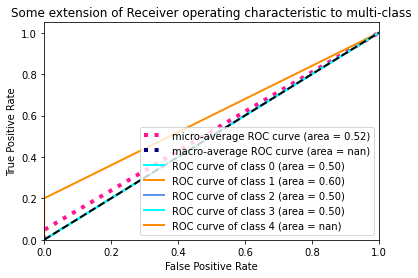

In [0]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings

#AUC ROC OVR and OVO
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(x_train, y_train_bin)
n_classes = 5
y_score = clf.predict(x_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw = 2

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()